# Multiple linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## loading the data  of the economic_index.csv in form of the dataframe 

In [4]:
df = pd.read_csv("economic_index.csv")
df.head(4)

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293


In [5]:
## dropin unneccessory coloumn
df.drop(columns=['Unnamed: 0', 'year', 'month'] , axis= 1 , inplace= True)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
# is null value exist 
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [8]:
import seaborn as sns

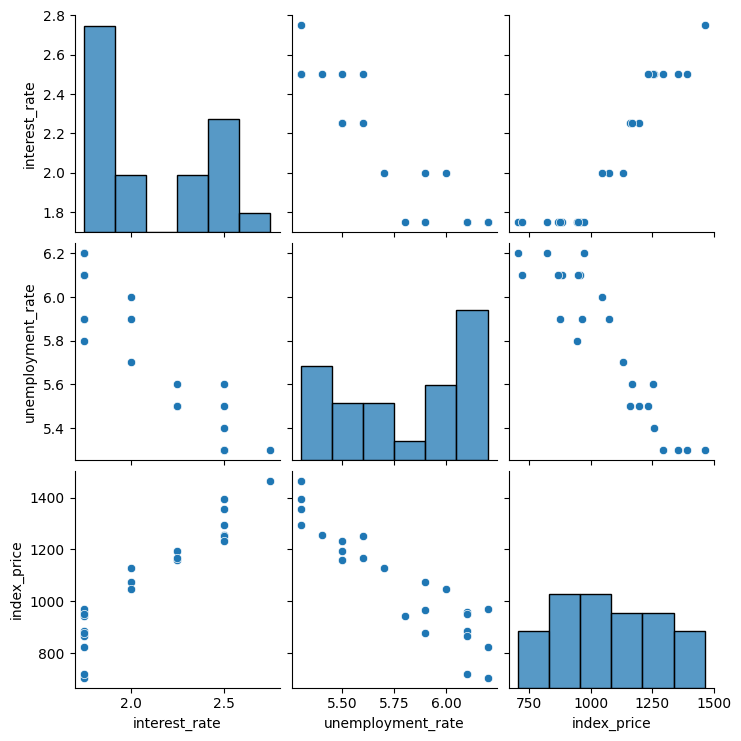

In [9]:
sns.pairplot(df)

In [10]:
df.corr()


,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

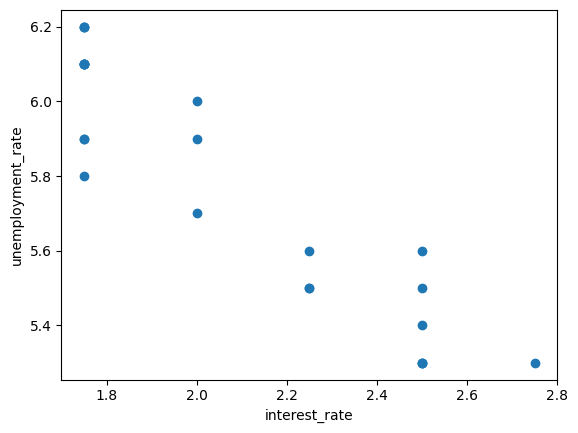

In [18]:
## visualtise the fetature indevuali
plt.scatter(df['interest_rate'] ,df['unemployment_rate'])
plt.xlabel("interest_rate")
plt.ylabel('unemployment_rate')

In [19]:
# independent and dependent feature 
x = df.iloc[:,:-1]
y = df.iloc[:, -1]
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [20]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [21]:
## train test split for the independent data and dependent data 
from sklearn.model_selection import train_test_split


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [25]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()
reg.fit(x_train,y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [92]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(reg
                                 ,x_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [93]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [94]:
## prediction
y_pred=reg.predict(x_test)

In [95]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [96]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [97]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


In [98]:
print(reg.coef_)

[  88.27275507 -116.25716066]


 ## Assumptions

Text(0, 0.5, 'y_pred')

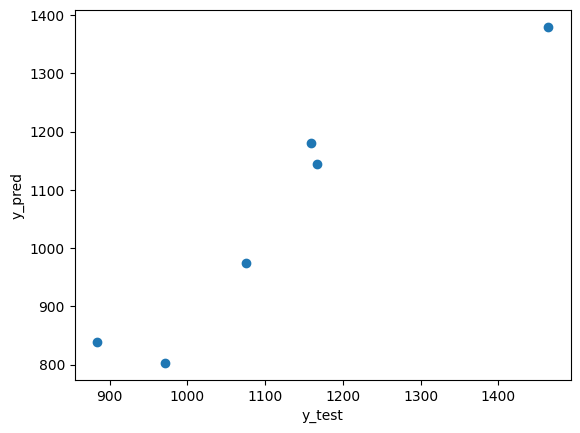

In [99]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel('y_pred')

In [100]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


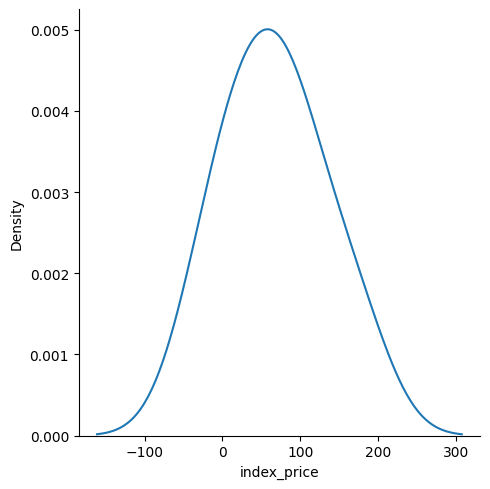

In [101]:
sns.displot(residuals,kind='kde')

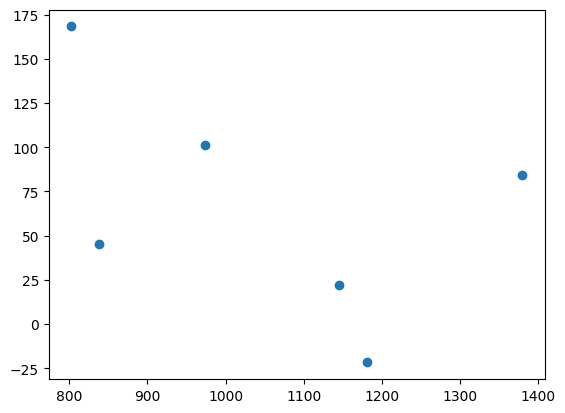

In [102]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [103]:
## if there is a data uniformily distrubuted then all good but if they fllowing any pattern then means somethis is wrong

In [ ]:
reg.pre